In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium

In [2]:
card_data = pd.read_csv('/content/cc_info.csv')
transaction_data=pd.read_csv('/content/transactions.csv')

In [3]:
card_data.head(10)


,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000
5,1997929794676601,Atlanta,NY,14808,21000
6,5449610971108305,Pittsburgh,PA,15201,6000
7,7482288151831611,Birmingham,NJ,8011,4000
8,8137811493121777,Washington,NH,3280,15000
9,7804216189681274,Los Angeles,CA,90001,20000


In [4]:
transaction_data.head(10)

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719
5,1003715054175576,2015-10-17 21:28:57,121.60,-80.243565,40.260887
6,1003715054175576,2015-08-29 18:34:04,122.65,-80.238186,40.245928
7,1003715054175576,2015-08-14 21:34:39,98.00,-80.244063,40.249143
8,1003715054175576,2015-09-17 19:20:37,95.20,-2.833179,34.745015
9,1003715054175576,2015-09-11 18:59:04,57.95,-80.287528,40.267874


In [5]:
card_data.isnull().sum()

,0
credit_card,0
city,0
state,0
zipcode,0
credit_card_limit,0


In [6]:
transaction_data.isnull().sum()

,0
credit_card,0
date,0
transaction_dollar_amount,0
Long,0
Lat,0


In [7]:
df= transaction_data.merge(card_data, on = 'credit_card' )

In [8]:
df.head(10)

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000
5,1003715054175576,2015-10-17 21:28:57,121.60,-80.243565,40.260887,Houston,PA,15342,20000
6,1003715054175576,2015-08-29 18:34:04,122.65,-80.238186,40.245928,Houston,PA,15342,20000
7,1003715054175576,2015-08-14 21:34:39,98.00,-80.244063,40.249143,Houston,PA,15342,20000
8,1003715054175576,2015-09-17 19:20:37,95.20,-2.833179,34.745015,Houston,PA,15342,20000
9,1003715054175576,2015-09-11 18:59:04,57.95,-80.287528,40.267874,Houston,PA,15342,20000


In [9]:
df.isnull().sum()

,0
credit_card,0
date,0
transaction_dollar_amount,0
Long,0
Lat,0
city,0
state,0
zipcode,0
credit_card_limit,0


In [10]:
df.shape

(294588, 9)

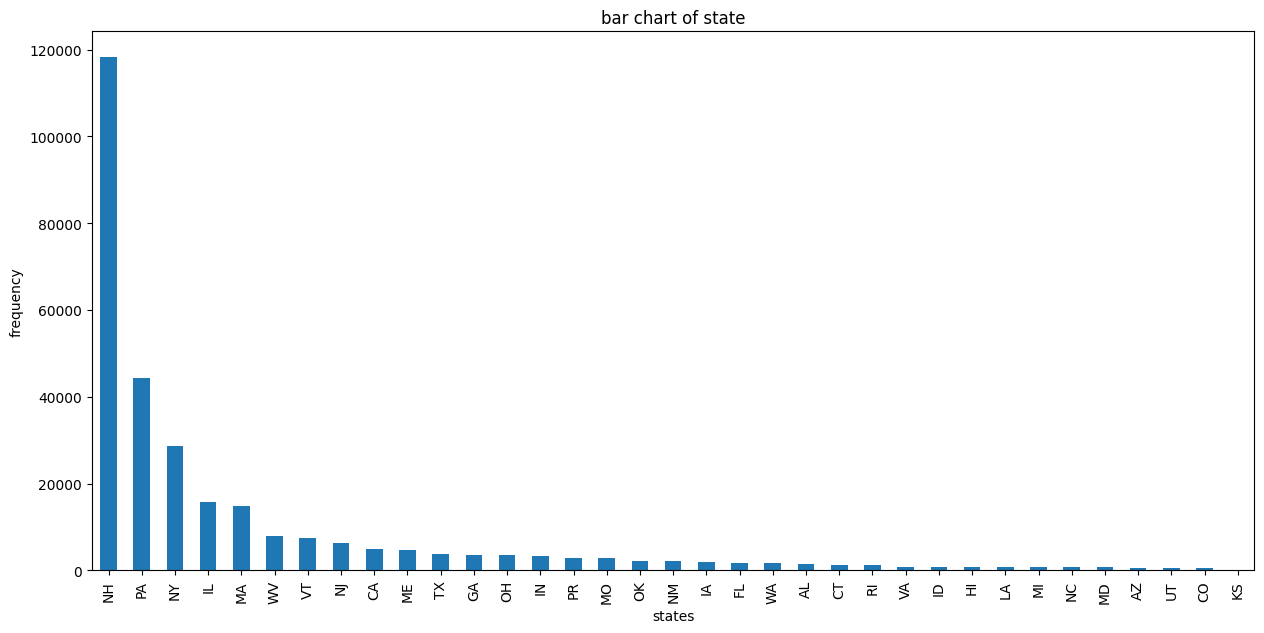

In [11]:
df['state'].value_counts().plot(kind='bar' , figsize=(15,7))
plt.title('bar chart of state')
plt.xlabel('states')
plt.ylabel('frequency')
plt.show()

In [12]:
def visualize_total_transactions_on_map(df):
    city_total_transactions = df.groupby('city')['transaction_dollar_amount'].sum().reset_index()

    map_center_lat = df['Lat'].mean()
    map_center_lon = df['Long'].mean()
    map_osm = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=10)

    max_total_transactions = city_total_transactions['transaction_dollar_amount'].max()

    for index, row in city_total_transactions.iterrows():
        city = row['city']
        total_transactions = row['transaction_dollar_amount']

        marker_size = total_transactions / max_total_transactions * 50  # Adjust the scaling factor as needed

        popup_text = f"City: {city}<br>Total Transactions: ${total_transactions:.2f}"

        marker = folium.CircleMarker(
            location=[df[df['city'] == city]['Lat'].mean(), df[df['city'] == city]['Long'].mean()],
            radius=marker_size,
            popup=popup_text,
            tooltip=city,
            fill=True,
            fill_opacity=0.7
        )

        marker.add_to(map_osm)

    return map_osm

if __name__ == "__main__":

    map_total_transactions = visualize_total_transactions_on_map(df)
    display(map_total_transactions)

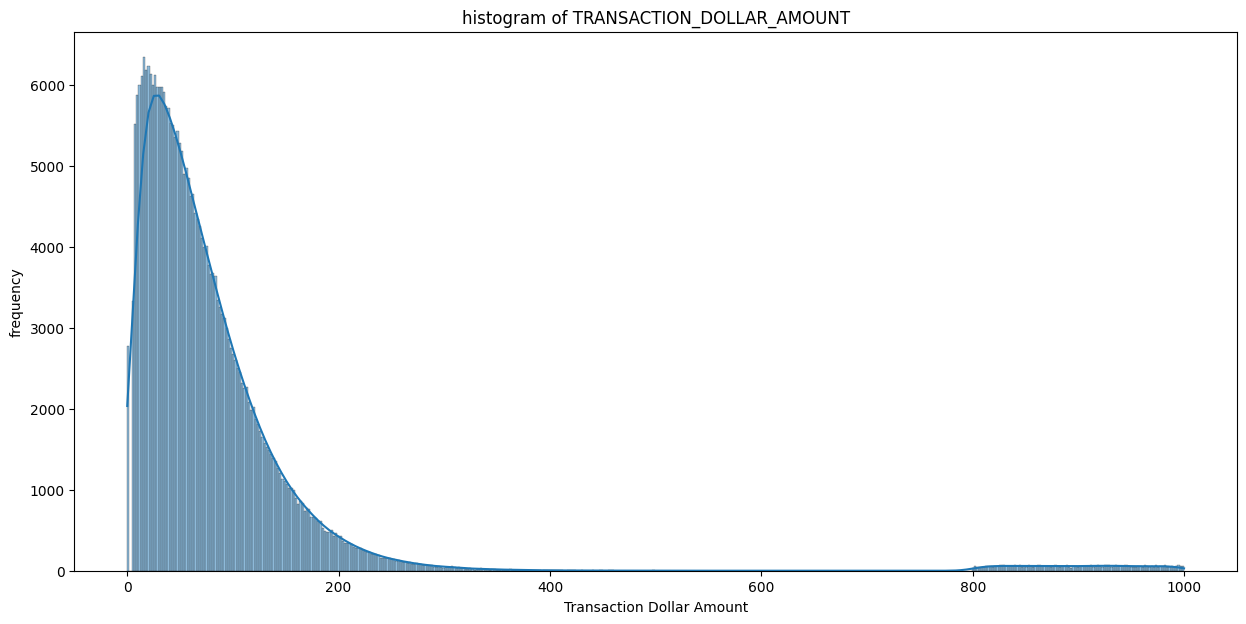

In [13]:
plt.figure(figsize=(15,7))
sns.histplot(df['transaction_dollar_amount'], kde=True)
plt.title('histogram of TRANSACTION_DOLLAR_AMOUNT')
plt.xlabel('Transaction Dollar Amount')
plt.ylabel("frequency")
plt.show()



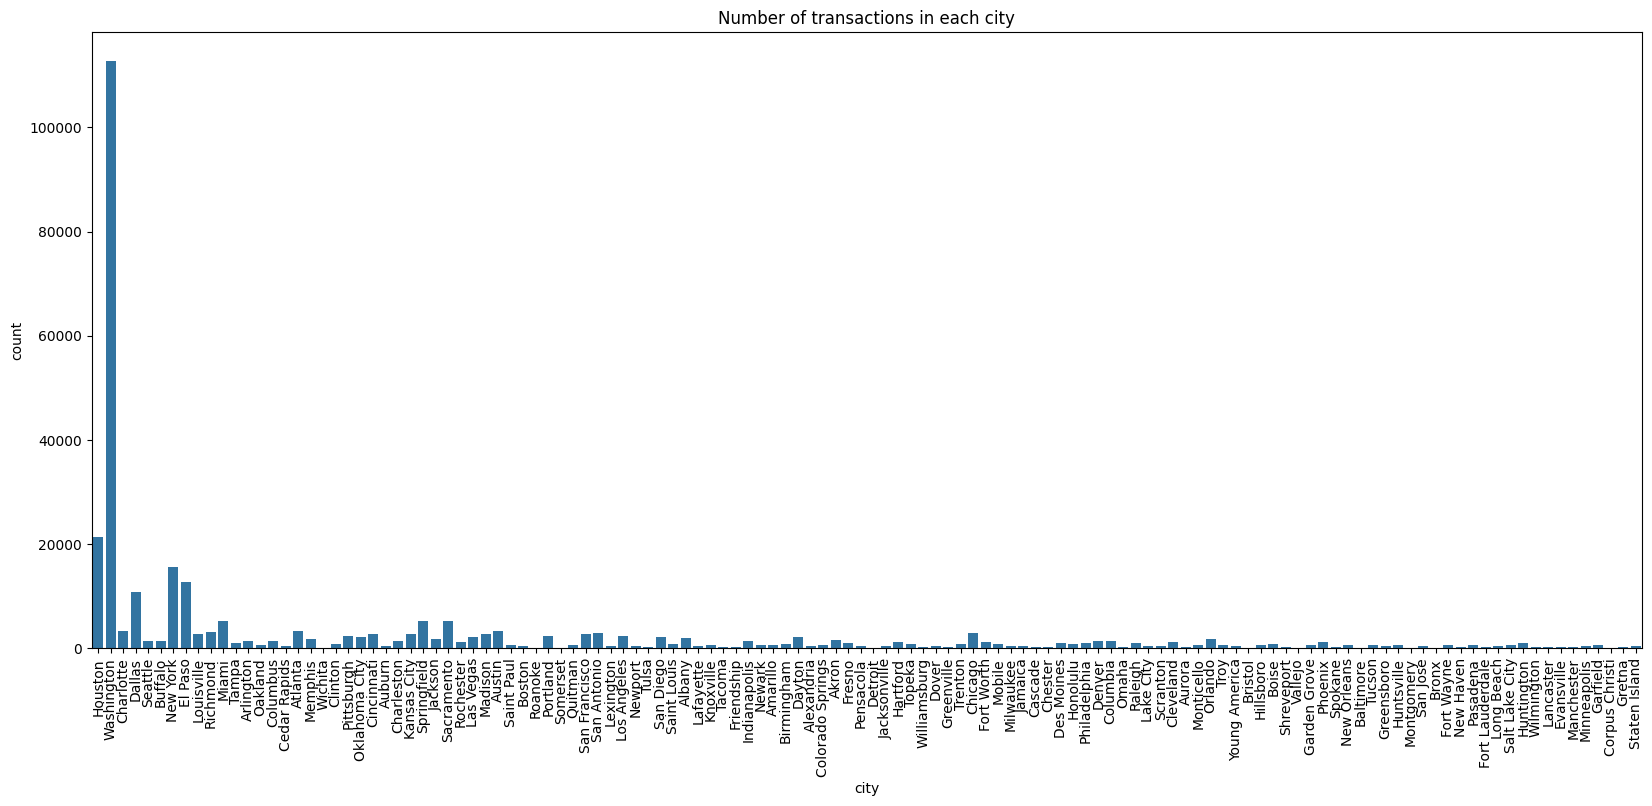

In [14]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='city')
plt.title('Number of transactions in each city')
plt.xlabel('city')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

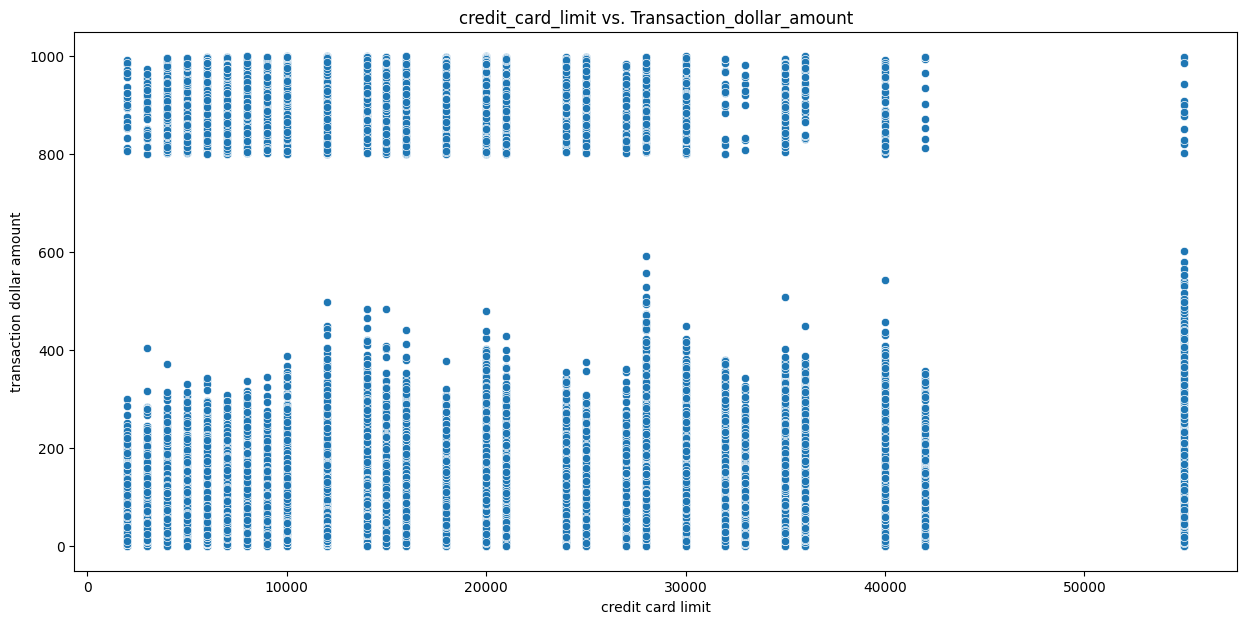

In [15]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df , x='credit_card_limit', y='transaction_dollar_amount')
plt.title('credit_card_limit vs. Transaction_dollar_amount')
plt.xlabel('credit card limit')
plt.ylabel('transaction dollar amount')
plt.show()

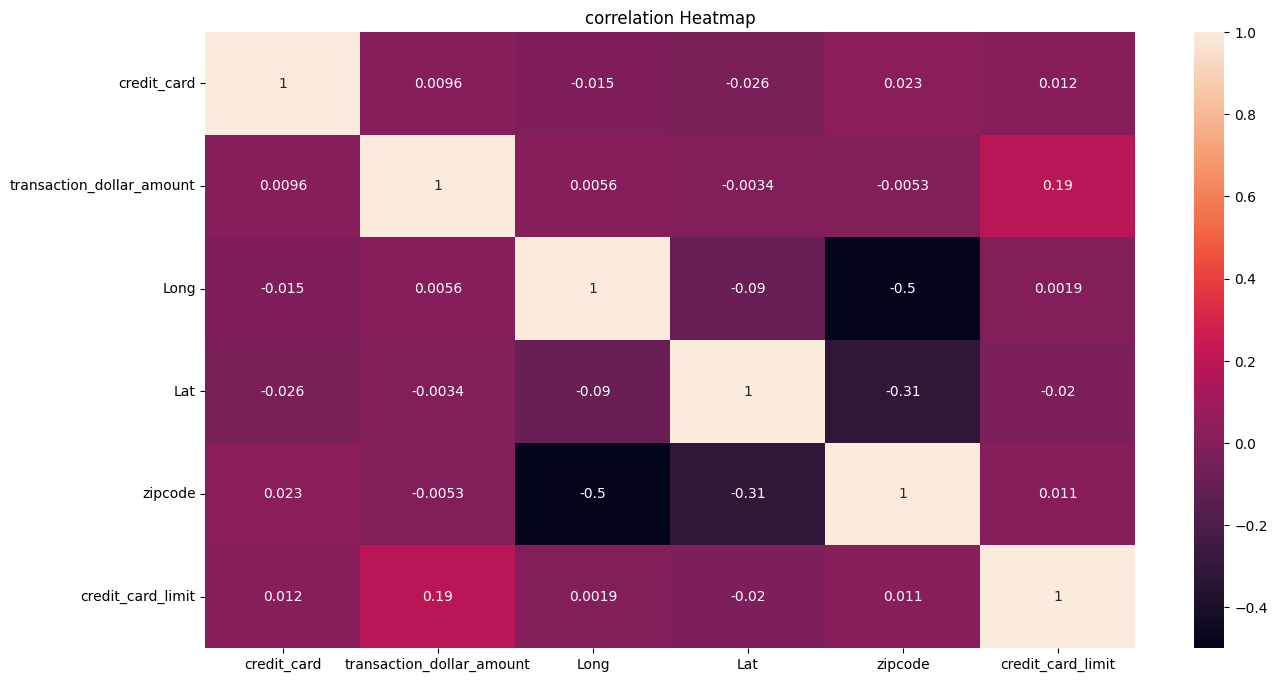

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True,)
plt.title('correlation Heatmap')
plt.show()

In [17]:
class FraudDetectionModel:
    def __init__(self, df):
        self.df = df
        self.feature_columns = ['transaction_dollar_amount', 'Long', 'Lat', 'credit_card_limit']
        self.model = None
        self.kmeans = None

    def data_preprocessing(self):
        scaler = StandardScaler()
        self.df[self.feature_columns] = scaler.fit_transform(self.df[self.feature_columns])

    def build_kmeans(self, n_clusters=2):
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    def create_labels(self):
        if self.kmeans is None:
            raise ValueError("K-means model has not been built yet. Please call 'build_kmeans' first.")

        self.kmeans.fit(self.df[self.feature_columns])

        self.df['cluster_label'] = self.kmeans.predict(self.df[self.feature_columns])

        cluster_fraud_label = self.df.groupby('cluster_label')['transaction_dollar_amount'].mean().idxmax()
        self.df['is_fraudulent'] = self.df['cluster_label'].apply(lambda x: 1 if x == cluster_fraud_label else 0)


    def visualize_fraudulent_transactions(self):
        plt.figure(figsize=(15, 8))
        sns.scatterplot(data=df, x='credit_card_limit', y='transaction_dollar_amount', hue = 'is_fraudulent')
        plt.title('Credit Card Limit vs. Transaction Dollar Amount')
        plt.xlabel('Credit Card Limit')
        plt.ylabel('Transaction Dollar Amount')
        plt.show()

    def build_model(self):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(len(self.feature_columns),)),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def train_model(self, X_train, y_train, epochs=10, batch_size=32):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    def evaluate_model(self, X_test, y_test):
        loss, accuracy = self.model.evaluate(X_test, y_test)

        y_pred = (self.model.predict(X_test) > 0.5).astype(int).flatten()
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

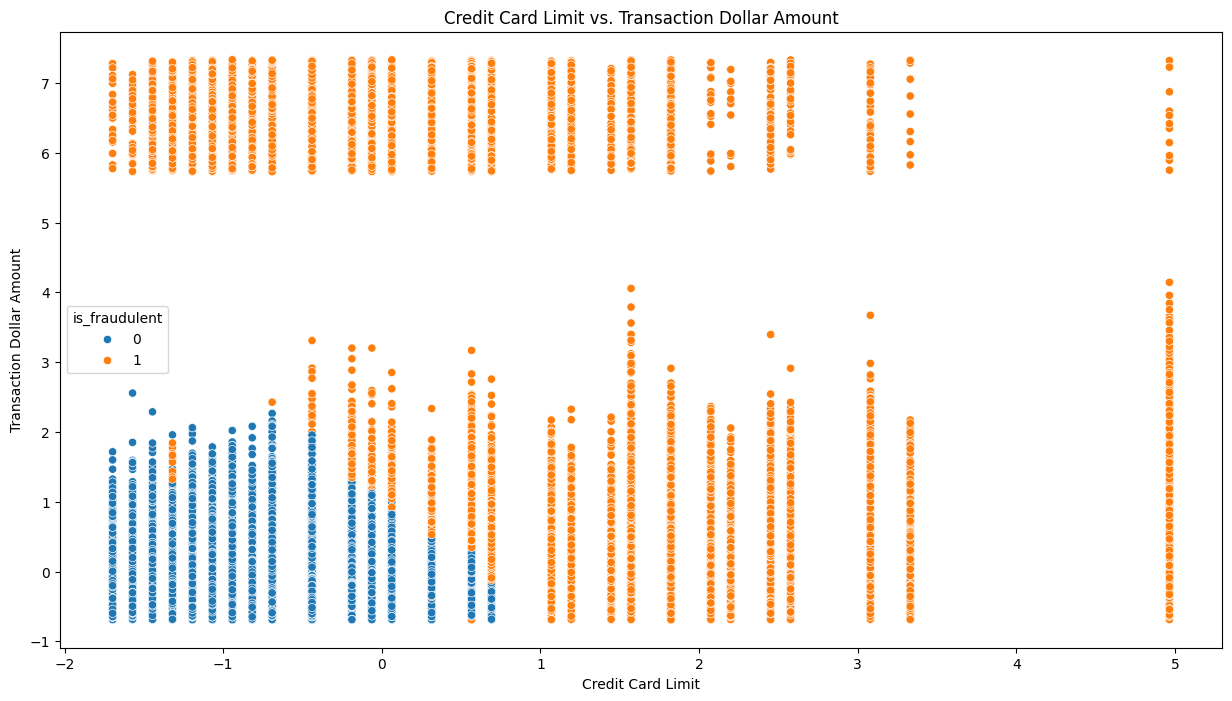

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Training Complete.
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9996 - loss: 0.0018
1842/1842 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44739
           1       1.00      1.00      1.00     14179

    accuracy                           1.00     58918
   macro avg       1.00      1.00      1.00     58918
weighted avg       1.00      1.00      1.00     58918

Confusion Matrix:
[[44732     7]
 [   23 14156]]


In [18]:
if __name__ == "__main__":

    model = FraudDetectionModel(df)
    model.data_preprocessing()
    model.build_kmeans()
    model.create_labels()

    model.visualize_fraudulent_transactions()

    X = model.df[model.feature_columns].values
    y = model.df['is_fraudulent'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.build_model()
    model.train_model(X_train, y_train, epochs=10, batch_size=32)

    print("Model Training Complete.")

    model.evaluate_model(X_test, y_test)


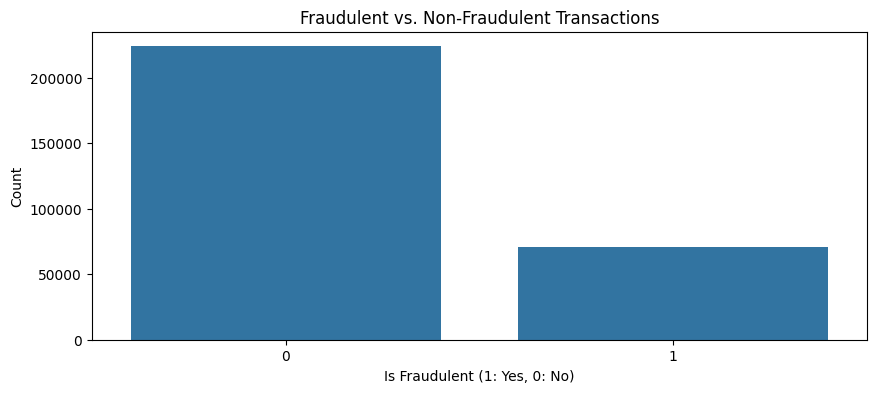

In [19]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='is_fraudulent')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

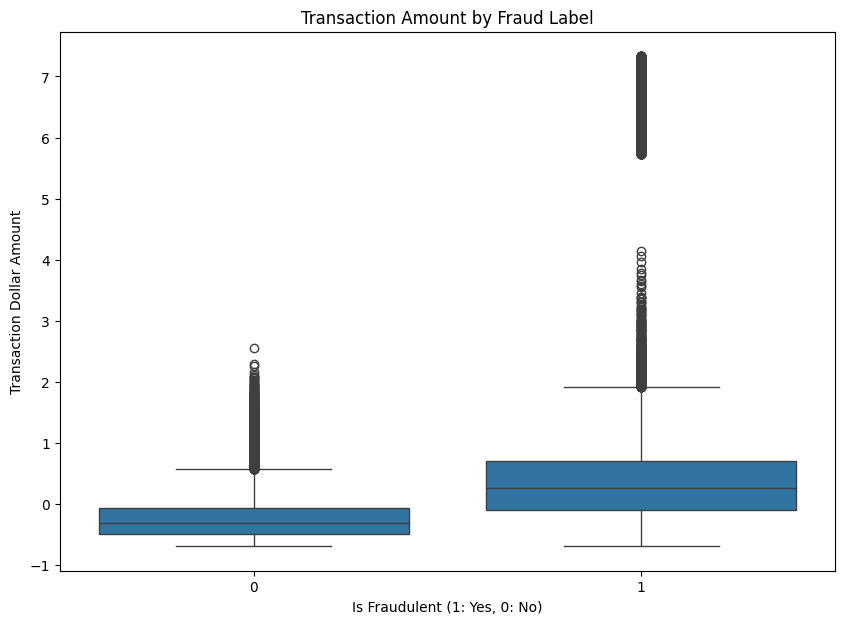

In [20]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='is_fraudulent', y='transaction_dollar_amount')
plt.title('Transaction Amount by Fraud Label')
plt.xlabel('Is Fraudulent (1: Yes, 0: No)')
plt.ylabel('Transaction Dollar Amount')
plt.show()

plt.figure(figsize=(10, 7))
correlation_matrix = df.corr()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Fraud Label')
plt.show()

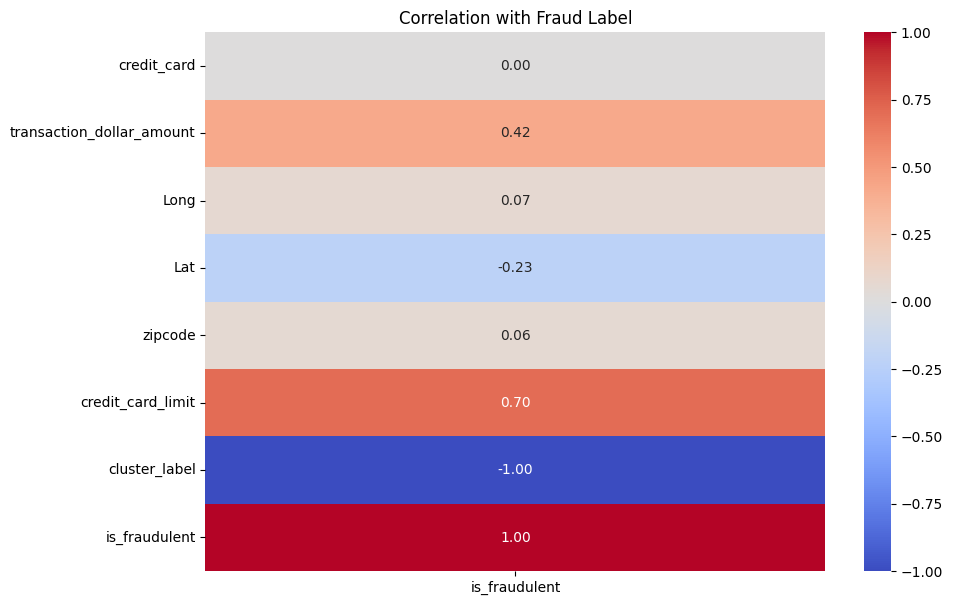

In [32]:
plt.figure(figsize=(10, 7))
correlation_matrix = df.corr(numeric_only="true")
sns.heatmap(correlation_matrix[['is_fraudulent']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Fraud Label')
plt.show()

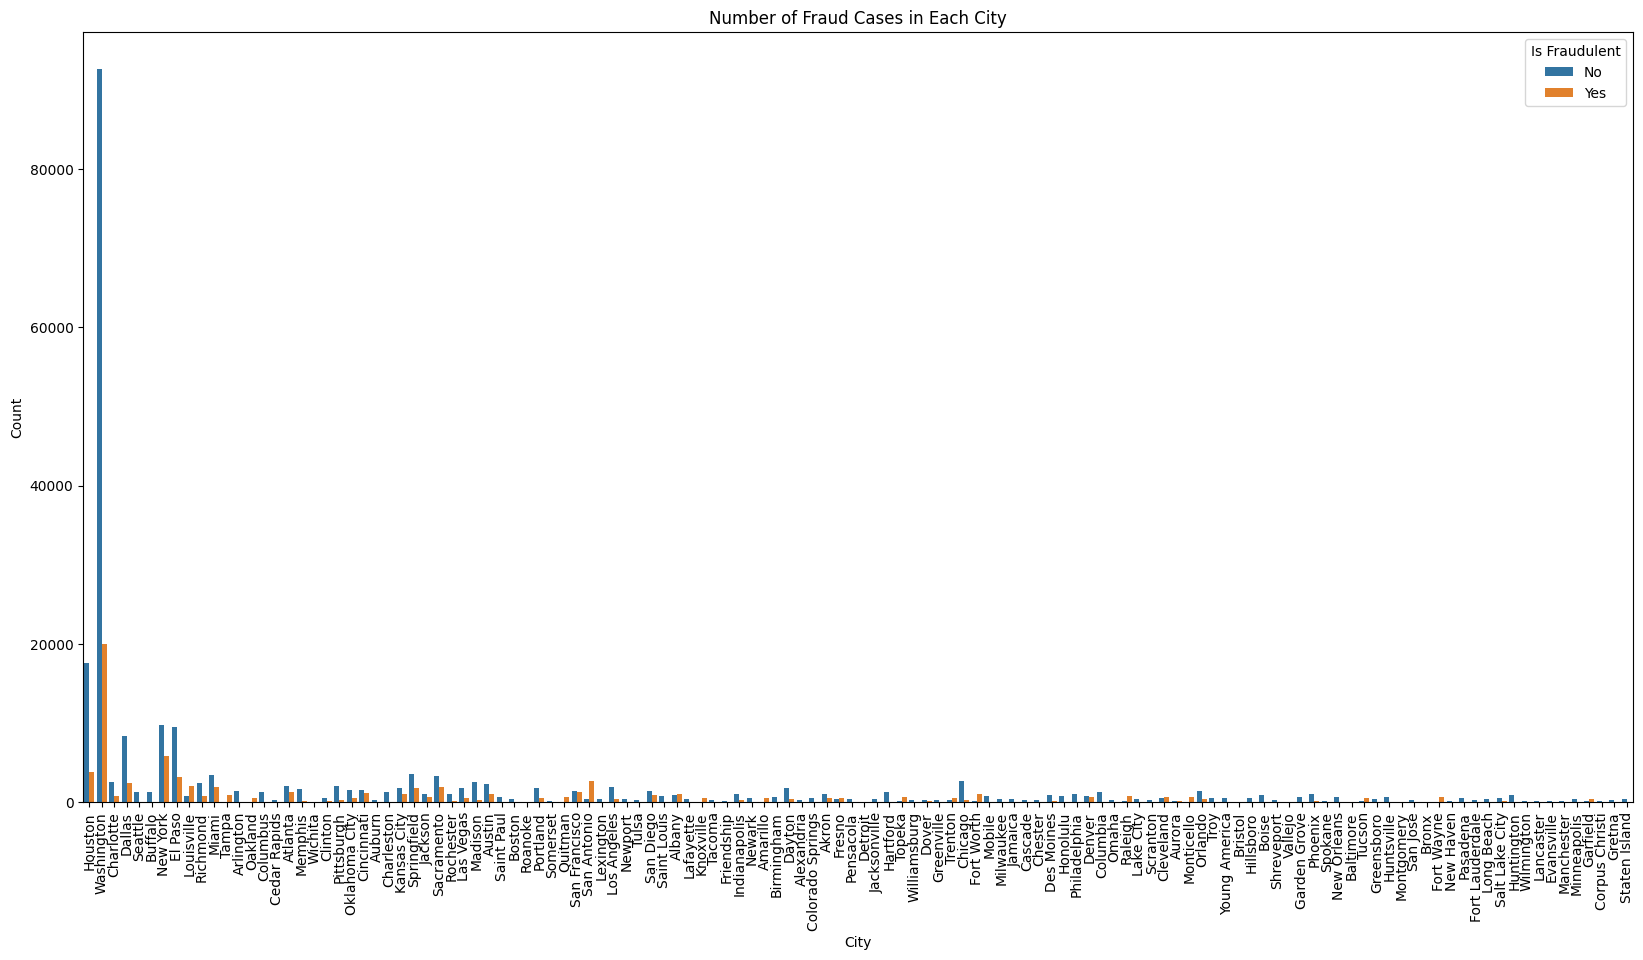

In [23]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='city', hue='is_fraudulent')
plt.title('Number of Fraud Cases in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Is Fraudulent', labels=['No', 'Yes'])
plt.show()

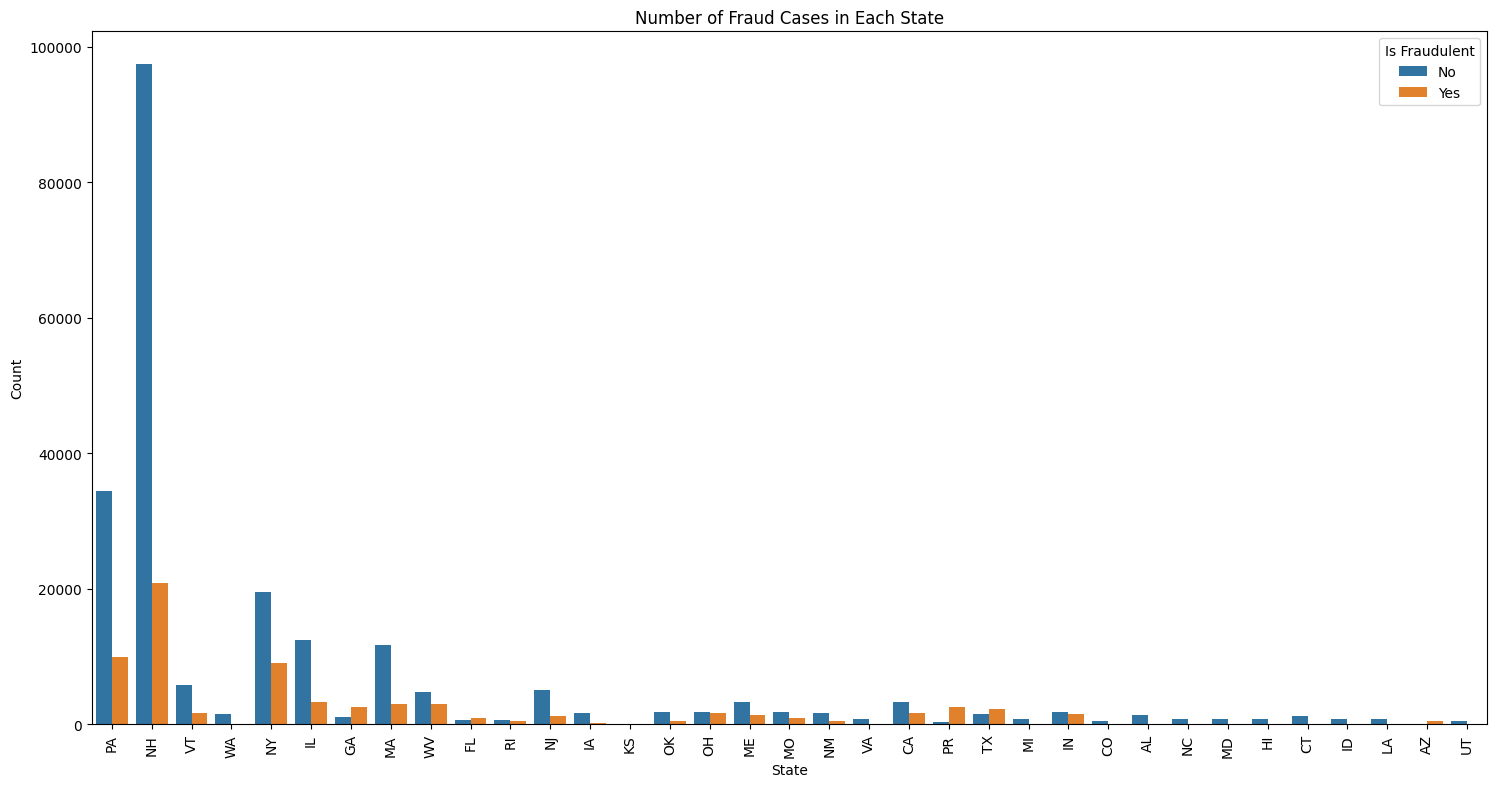

In [24]:
plt.figure(figsize=(18, 9))
sns.countplot(data=df, x='state', hue='is_fraudulent')
plt.title('Number of Fraud Cases in Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Is Fraudulent', labels=['No', 'Yes'])
plt.show()